<a href="https://colab.research.google.com/github/Valeriy1990/Neural_networks/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2%D0%BE%D0%B7%D1%8C%D0%BC%D0%B8%D1%82%D0%B5_MobileNet_%D0%B8_%D0%B0%D1%83%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение модели с помощью предобученной модели возьмите MobileNet и аугментации изображений.

---



In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip

--2025-10-25 13:06:25--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip.2’

cat-and-dog.zip.2   100%[===================>] 217.52M  15.0MB/s    in 16s     

2025-10-25 13:06:41 (13.8 MB/s) - ‘cat-and-dog.zip.2’ saved [228082266/228082266]



In [ ]:

!pip install tensorflow Keras

In [ ]:
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

Создание обучающей базы

In [ ]:
# @title
import os
os.listdir(IMAGE_PATH)

# Набор утилит для работы с файловой системой
import shutil

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

data_files = []  # Cписок путей к файлам изображений
data_labels = [] # Список меток классов

for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Полный путь к папке с изображениями класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(class_path)

    # Вывод информации о численности класса
    print(f'Размер класса {class_name} составляет {len(class_files)} животных')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    # Создаем обучающую выборку для заданного класса из диапазона (0-2000)
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 2000)
    # Создаем проверочную выборку для заданного класса из диапазона (2000-3000)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 2000, 3000)
    # Создаем тестовую выборку для заданного класса из диапазона (3000-4000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 3000, 4000)

print('Число кошек %s, число собак %s в обучающей выборке' \
      % (
          len(os.listdir(os.path.join(train_dir, 'cats'))),
          len(os.listdir(os.path.join(train_dir, 'dogs')))
         )
      )

print('Число кошек %s, число собак %s в проверочной выборке' \
      % (
          len(os.listdir(os.path.join(validation_dir, 'cats'))),
          len(os.listdir(os.path.join(validation_dir, 'dogs')))
         )
      )

print('Число кошек %s, число собак %s в контрольной выборке' \
      % (
          len(os.listdir(os.path.join(test_dir, 'cats'))),
          len(os.listdir(os.path.join(test_dir, 'dogs')))
         )
      )


Количество классов: 2, метки классов: ['cats', 'dogs']
Размер класса cats составляет 4000 животных
Размер класса dogs составляет 4005 животных
Общий размер базы для обучения: 8005
Число кошек 2000, число собак 2000 в обучающей выборке
Число кошек 1000, число собак 1000 в проверочной выборке
Число кошек 1000, число собак 1000 в контрольной выборке


Конструирование сети

In [ ]:
from keras.applications import MobileNet
from keras import models
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from keras import optimizers

def model_maker():
  IMG_WIDTH = 150
  IMG_HEIGHT = 150
  base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

  for layer in base_model.layers[:]:
        layer.trainable = False

  input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  custom_model = base_model(input)
  custom_model = GlobalAveragePooling2D()(custom_model)
  custom_model = Dense(64, activation='relu')(custom_model)
  custom_model = Dropout(0.5)(custom_model)
  predictions = Dense(CLASS_COUNT, activation='softmax')(custom_model)

  return models.Model(inputs=input, outputs=predictions)

In [ ]:
model_maker().summary()

/tmp/ipython-input-3769698134.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,294,594 (12.57 MB)

 Trainable params: 65,730 (256.76 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Создаём модель

In [ ]:
from keras import optimizers

my_model = model_maker()

# Оптимизатор можно задавать по имени с параметрами по умолчанию,
# а можно как метод с заданием значений параметров
# Описание параметров RMSprop - https://keras.io/api/optimizers/rmsprop/
my_model.compile(loss='categorical_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

/tmp/ipython-input-3769698134.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))


Предварительная обработка данных

In [ ]:
BATCH_SIZE = 20

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Импортируем генератор изображений

# Создаем генераторы для  обучающей и тестовой выборок
# Предварительно нормализуем данные делением на 255, приводим интесивность пикселей картинки к диапазону от 0 до 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Генерируем мини-батчи для обучения из заданной директории
train_generator = train_datagen.flow_from_directory(
    train_dir, # Целевой каталог
    target_size=(150, 150), # Привести все изображения к размеру 150 × 150
    batch_size=BATCH_SIZE, # Размер батча
    class_mode='categorical'  # Делаем генерацию для задачи бинарной классификации (метки бинарные)
)

# Генерируем мини-батчи для проверки из заданной директории
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Целевой каталог
    target_size=(150, 150), # Привести все изображения к размеру 150 × 150
    batch_size=BATCH_SIZE, # Размер батча
    class_mode='categorical'  # Делаем генерацию для задачи бинарной классификации (метки бинарные)
)

# Выводим с помощью генератора пакет с изображениями и метками
for data_batch, labels_batch in train_generator:
    print('Форма пакета с изображениями:', data_batch.shape)
    print('Форма пакета с метками:', labels_batch.shape)
    break


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Форма пакета с изображениями: (20, 150, 150, 3)
Форма пакета с метками: (20, 2)


In [ ]:
# цикл обучения
history = my_model.fit(
    train_generator,                        # генератор для обучения
    epochs=30,                              # число эпох обучения
    validation_data=validation_generator,   # генератор проверочной выборки
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 531ms/step - acc: 0.7273 - loss: 0.8248 - val_acc: 0.9435 - val_loss: 0.1333
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 495ms/step - acc: 0.9345 - loss: 0.1768 - val_acc: 0.9510 - val_loss: 0.1179
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 507ms/step - acc: 0.9469 - loss: 0.1410 - val_acc: 0.9615 - val_loss: 0.1054
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 503ms/step - acc: 0.9577 - loss: 0.1178 - val_acc: 0.9580 - val_loss: 0.1017
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 503ms/step - acc: 0.9557 - loss: 0.1063 - val_acc: 0.9625 - val_loss: 0.0980
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 98s 491ms/step - acc: 0.9603 - loss: 0.0871 - val_acc: 0.9600 - val_loss: 0.0973
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 493ms/step - acc: 0.9688 - loss: 0.0779 - val_acc: 0.9625 - val_loss: 0.0947
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 494ms/step - acc: 0.9799 - loss: 0.0638 - val_acc: 0.9630 - val_loss: 0.1009
Epoch 9/30
200/200 ━━━━━━━━

Построим графики динамики точности и потерь модели по обучающим и проверочным данным в процессе обучения:

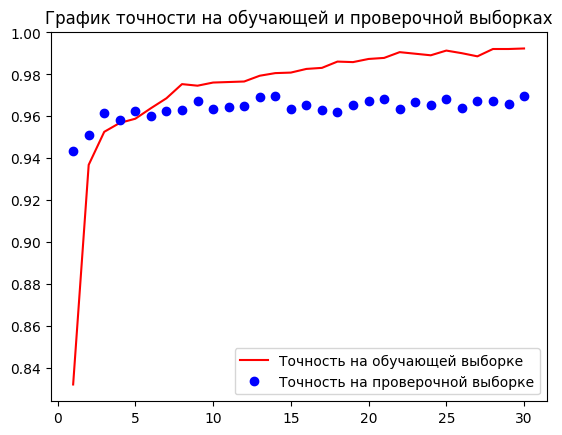

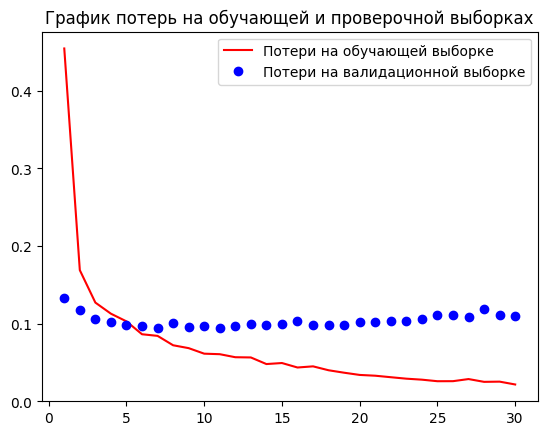

In [ ]:
import matplotlib.pyplot as plt           # библиотека для рисования графиков
acc = history.history['acc']              # данные о точности на обучающей выборке
val_acc = history.history['val_acc']      # данные о точности на проверочной выборке
loss = history.history['loss']            # данные об ошибке на обучающей выборке
val_loss = history.history['val_loss']    # данные об ошибке на проверочной выборке
epochs = range(1, len(acc) + 1)           # массив со значениями для оси абсцисс (Х)
plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')          #  строим график точность на обучающей выборке
plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')   #  строим график точность на проверочной выборке
plt.title('График точности на обучающей и проверочной выборках')           #  заголовок графика
plt.legend()                                                               #  легенда графика
plt.figure()                                                               #  создаем новую фигуру (полотно для графика)
plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')           #  строим график потерь (ошибки) на обучающей выборке
plt.plot(epochs, val_loss, 'bo', label='Потери на валидационной выборке')  #  строим график потерь на проверочной выборке
plt.title('График потерь на обучающей и проверочной выборках')             #  заголовок графика
plt.legend()                                                               #  легенда графика
plt.show()                                                                 #  рисуем график

Аугментация (расширение данных)

In [ ]:
BATCH_SIZE = 24

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
)

# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Проверка на контрольных данных

In [ ]:
history = my_model.fit(
    train_generator,                        # генератор для обучения
    epochs=5,                              # число эпох обучения
    validation_data=validation_generator,   # генератор проверочной выборки
)

Epoch 1/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 122s 728ms/step - acc: 0.9402 - loss: 0.1747 - val_acc: 0.9690 - val_loss: 0.0942
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 125s 750ms/step - acc: 0.9490 - loss: 0.1451 - val_acc: 0.9690 - val_loss: 0.0938
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 129s 771ms/step - acc: 0.9439 - loss: 0.1597 - val_acc: 0.9680 - val_loss: 0.0954
Epoch 4/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 120s 718ms/step - acc: 0.9421 - loss: 0.1449 - val_acc: 0.9675 - val_loss: 0.0937
Epoch 5/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 126s 757ms/step - acc: 0.9434 - loss: 0.1495 - val_acc: 0.9675 - val_loss: 0.0941


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_loss, test_acc = my_model.evaluate(test_generator, steps=50)
print('Точность на контрольной выборке:', test_acc)

Found 2000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 321ms/step - acc: 0.9860 - loss: 0.0583
Точность на контрольной выборке: 0.9789999723434448
